<a href="https://colab.research.google.com/github/Andres-Gress/EDP_I/blob/main/Membrana_vibratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Resolución de la EDP**

$\frac{\partial^2 u}{\partial t^2} = c^2 \left(
\frac{\partial^2 u}{\partial x^2} +
\frac{\partial^2 u}{\partial y^2}
\right)$


Que satisface la condición de frontera

$u=0$

Y las condiciones iniciales

$u(x,y,0)=f(x,y)$

$\left.
\frac{\partial u}{\partial t}
\right|_{t=0}=g(x,y)$

donde $g(x,y)=0$

Y $f(x,y)=0.1(4x-x^2)(2y-y^2)$

**SOLUCIÓN**

$U(x,y,t)=X(x)Y(y)T(t)$


Sustituyendo

$\frac{1}{c^2}T''XY =X''YT+Y''XT$

$\frac{1}{c^2}\frac{T''}{T}=\frac{X''}{X}+\frac{Y''}{Y}$

Proponemos la separación

$\frac{X''}{X}=-\mu \quad $ y $ \quad \frac{Y''}{Y}=k+\mu$

Obtenemos las 3 ecuaciones

$X''+\mu X=0 \quad X(0)=X(4)=0$

$Y''-(k+\mu)Y=0 \quad Y(0)=Y(2)=0$

$T''-c^2kT=0$

Donde las primeras 2 ecuaciones corresponden a problemas de STURM-LIOVILLE

Así

$X_n(x)=sen(\frac{n\pi x}{4})$

$Y_m(y)=sen(\frac{m\pi y}{2})$

$T_{mn}(t)=A_{mn}cos(c\sqrt{K_{mn}}t)$

Y la solución general es

$u(x, y, t) = \sum_{m=1}^{\infty} \sum_{n=1}^{\infty}
A_{mn} \cos\left( c \sqrt{ \left( \frac{n\pi}{4} \right)^2 + \left( \frac{m\pi}{2} \right)^2 } \, t \right)
\sin\left( \frac{n\pi x}{4} \right) \sin\left( \frac{m\pi y}{2} \right)$

Usando la condición inicial

$u(x,y,0)=\sum_{m=1}^{\infty} \sum_{n=1}^{\infty}
A_{mn}\sin\left( \frac{n\pi x}{4} \right) \sin\left( \frac{m\pi y}{2} \right)=f(x,y)$

Obteniendo la serie de Fourier de $f(x,y)$ para obtener el coeficiente $A_{mn}$


$A_{mn} = \frac{8}{4} \int_0^4 \int_0^2 0.1(4x - x^2)(2y - y^2)
\sin\left( \frac{n\pi x}{4} \right)
\sin\left( \frac{m\pi y}{2} \right) dy\,dx$


$A_{mn}=\frac{102.4}{(n\pi)^3(m\pi)^3}[(-1)^{n+1}+1][(-1)^{m+1}+1]$

Sustituyendo en la solución general se tiene:


$u(x, y, t) = \sum_{n=1}^{\infty} \sum_{m=1}^{\infty}
\frac{102.4}{(n\pi)^3(m\pi)^3}[(-1)^{n+1}+1][(-1)^{m+1}+1] \cos\left( c \sqrt{ \left( \frac{n\pi}{4} \right)^2 + \left( \frac{m\pi}{2} \right)^2 } \, t \right)
\sin\left( \frac{n\pi x}{4} \right) \sin\left( \frac{m\pi y}{2} \right)$


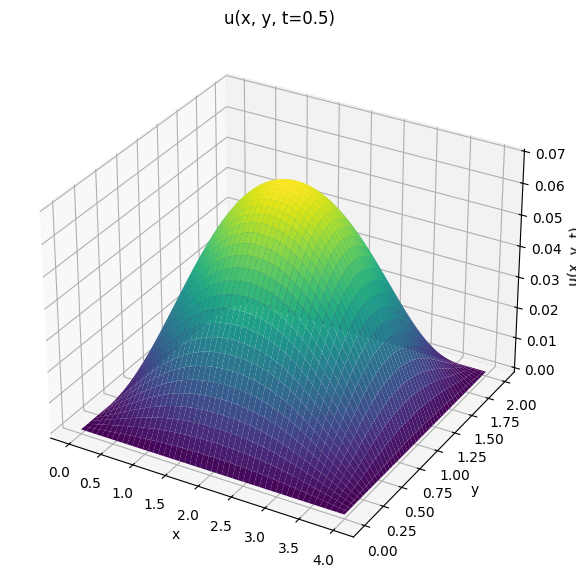

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

c = 1
a = 4
b = 2
N = 5
M = 5
t = 0.5

x = np.linspace(0, a, 100)
y = np.linspace(0, b, 100)
X, Y = np.meshgrid(x, y)

U = np.zeros_like(X)

const = 102.4 / (np.pi**6)

for n in range(1, N+1):
    for m in range(1, M+1):
        parity_n = (-1)**(n + 1) + 1
        parity_m = (-1)**(m + 1) + 1

        if parity_n == 0 or parity_m == 0:
            continue

        Amn = const / (n**3 * m**3)

        omega_mn = c * np.sqrt((n * np.pi / a)**2 + (m * np.pi / b)**2)

        term = Amn * np.cos(omega_mn * t) * np.sin(n * np.pi * X / a) * np.sin(m * np.pi * Y / b)

        U += term

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, U, cmap='viridis')
ax.set_title(f'u(x, y, t={t})')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y, t)')
plt.show()


Gráfica de la solución de la EDP